In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]  ## mac
plt.rcParams['font.family'] = ['Arial Unicode MS']  ## mac
plt.rcParams["axes.unicode_minus"] = False

In [37]:
data = pd.read_csv('../dataset/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX'].sort_index(ascending=True)
spx.head()

Date
1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

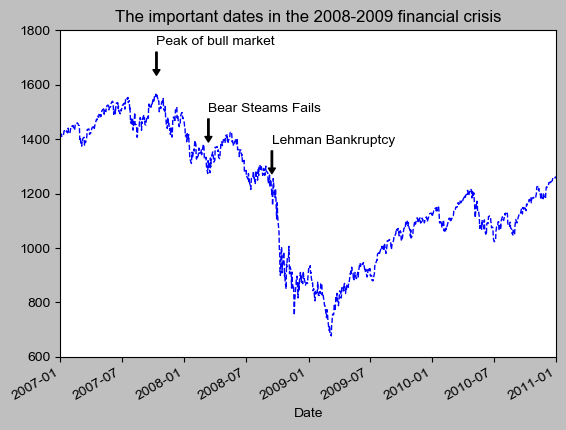

In [38]:
fig, ax = plt.subplots()
spx.plot(ax=ax, color='blue', linestyle='--', linewidth=1)
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Steams Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]
for date, label in crisis_data:
    ax.annotate(label,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', shrink=0.05, headwidth=5, width=1, headlength=4),
                horizontalalignment='left',
                verticalalignment='top')
    ax.set_xlim(['1/1/2007', '1/1/2011'])
    ax.set_ylim([600, 1800])
    ax.set_title("The important dates in the 2008-2009 financial crisis")

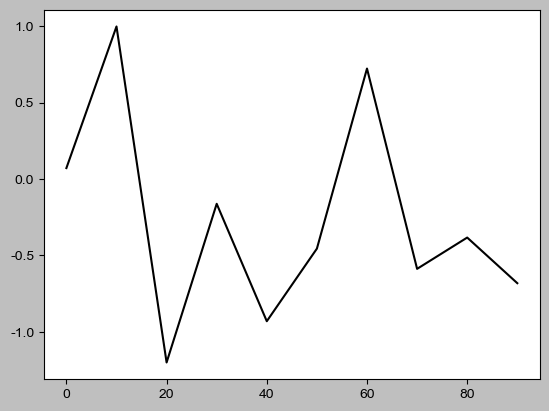

In [39]:
data = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
data.plot();

In [40]:
data

0     0.071481
10    0.998337
20   -1.200852
30   -0.162283
40   -0.930853
50   -0.455616
60    0.722904
70   -0.588033
80   -0.383213
90   -0.681875
dtype: float64

<Axes: >

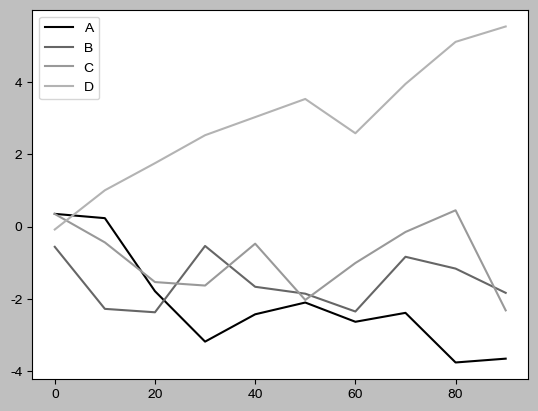

In [41]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

<Axes: >

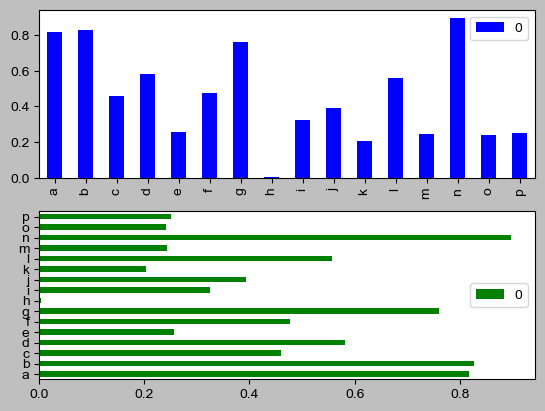

In [42]:
df1 = pd.DataFrame(np.random.uniform(size=16),
                   index=list("abcdefghijklmnop"))
fig, axes = plt.subplots(2, 1)
df1.plot.bar(ax=axes[0], color='blue', linestyle='--', linewidth=1)
df1.plot.barh(ax=axes[1], color='green', linestyle='--', linewidth=1)

In [43]:
df2 = pd.DataFrame(np.random.uniform(size=(6, 4)),
                   index=["one", "two", "three", "four", "five", "six"],
                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"),
                   )
df2

Genus,A,B,C,D
one,0.402718,0.155898,0.382160,0.041512
two,0.967072,0.184408,0.136069,0.648157
three,0.213528,0.061079,0.666249,0.307083
four,0.700098,0.054411,0.106325,0.401242
five,0.080975,0.974995,0.422604,0.005553
six,0.291395,0.982571,0.928739,0.606601


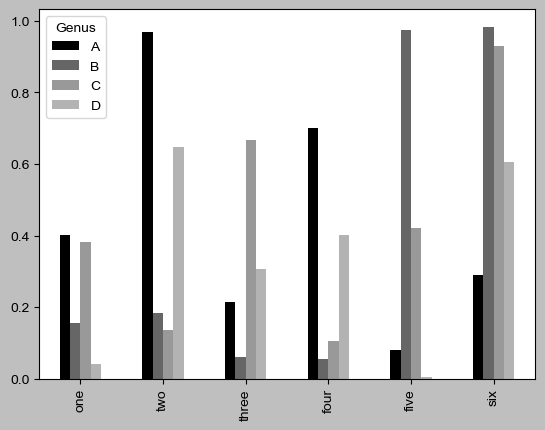

In [44]:
df2.plot.bar();

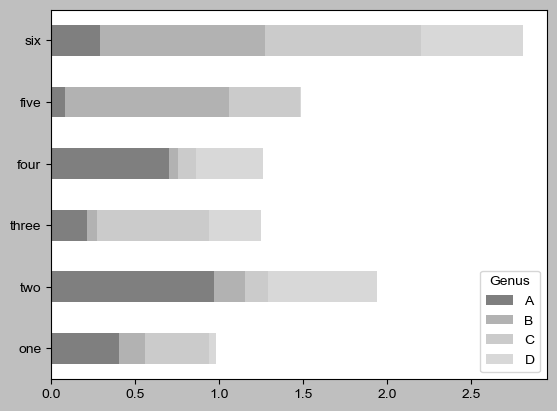

In [45]:
df2.plot.barh(stacked=True, alpha=0.5);

In [46]:
tips = pd.read_csv('../dataset/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [47]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts.head()

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [48]:
party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [49]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [50]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


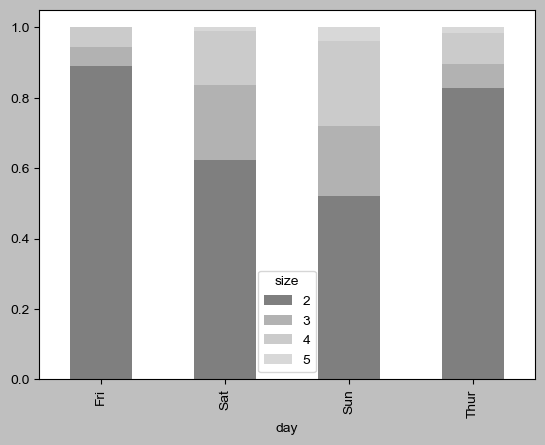

In [51]:
party_pcts.plot.bar(stacked=True, alpha=0.5);

In [53]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [54]:
tips['tips_pcts'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tips_pcts
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tips_pcts', ylabel='day'>

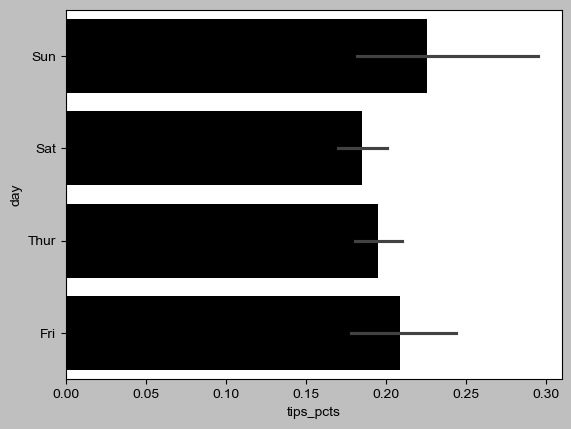

In [58]:
sns.barplot(data=tips, x="tips_pcts", y="day")

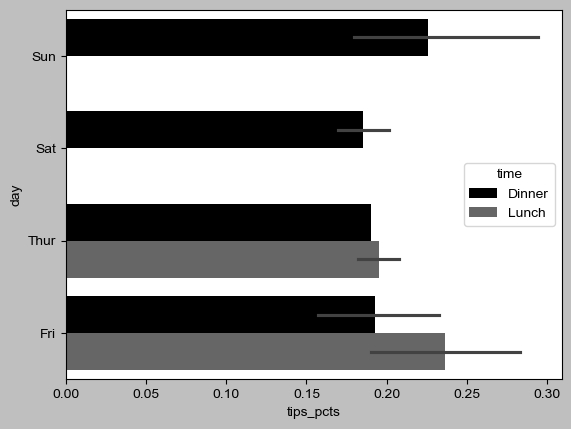

In [61]:
sns.barplot(x="tips_pcts", y="day", hue="time", data=tips, orient="h")
sns.set_style("whitegrid")

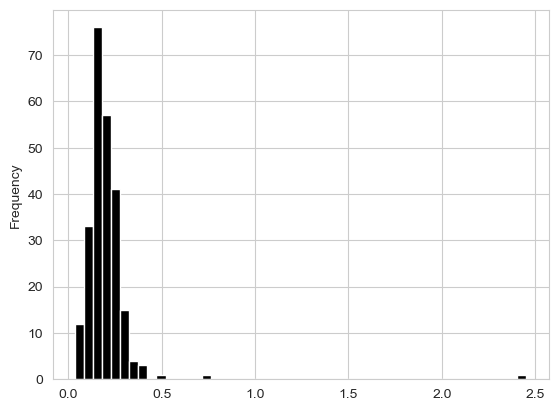

In [65]:
# 直方图
tips["tips_pcts"].plot.hist(bins=50);

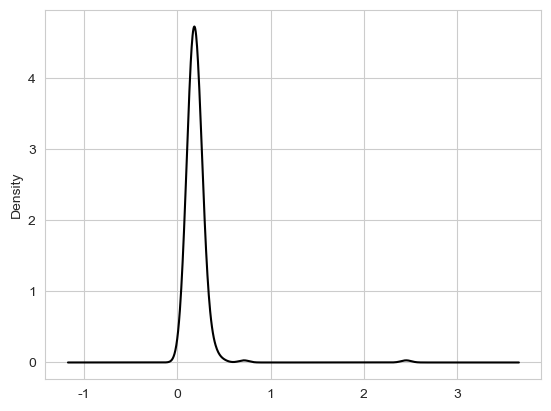

In [67]:
# 密度图
tips["tips_pcts"].plot.density();

In [68]:
# 散点图
macro = pd.read_csv('../dataset/examples/macrodata.csv')
macro.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [69]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [73]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


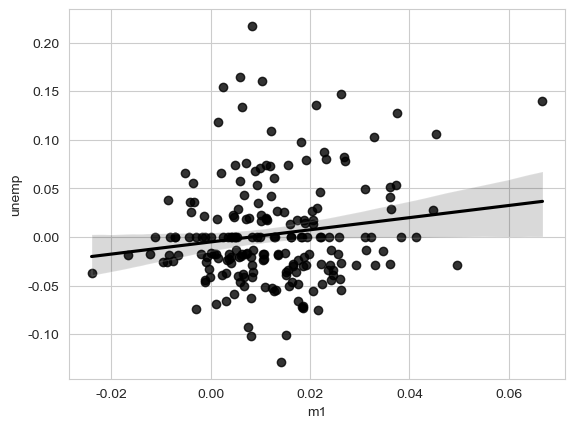

In [72]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)

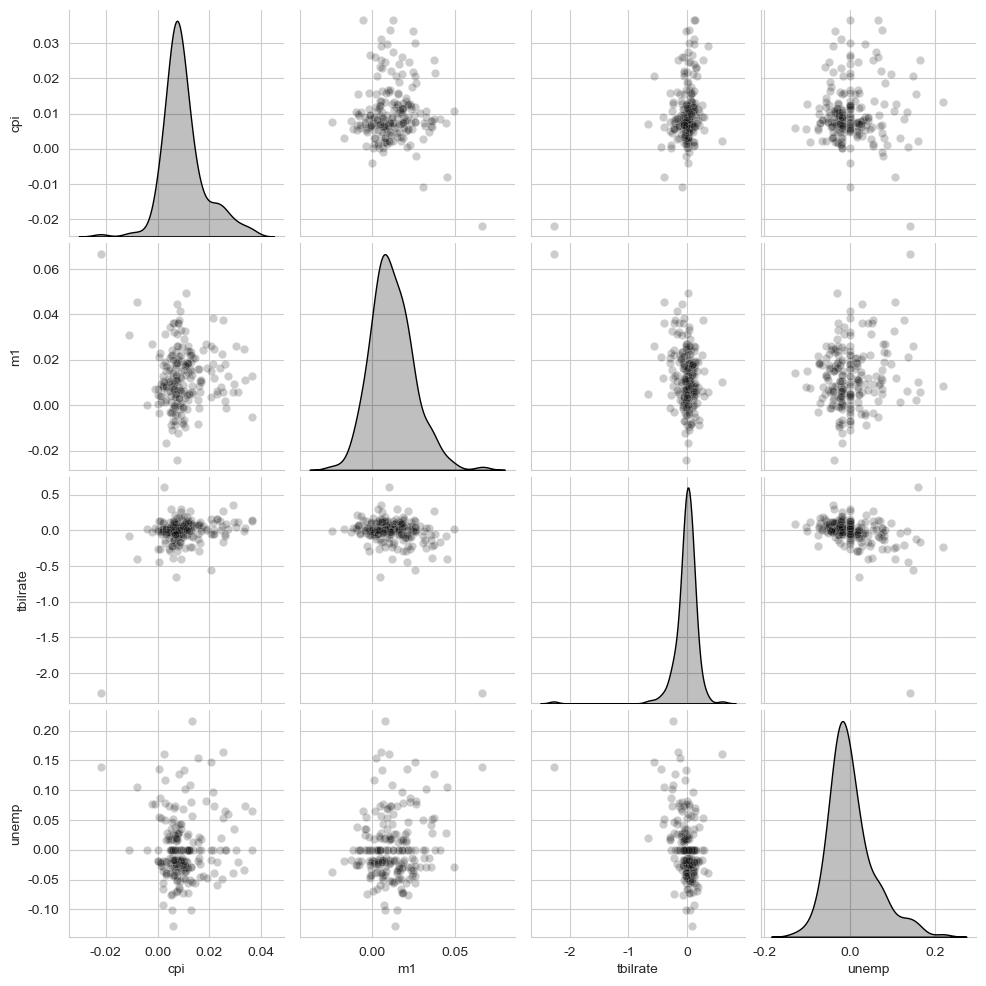

In [75]:
sns.pairplot(data=trans_data, diag_kind="kde", plot_kws={"alpha": 0.2});

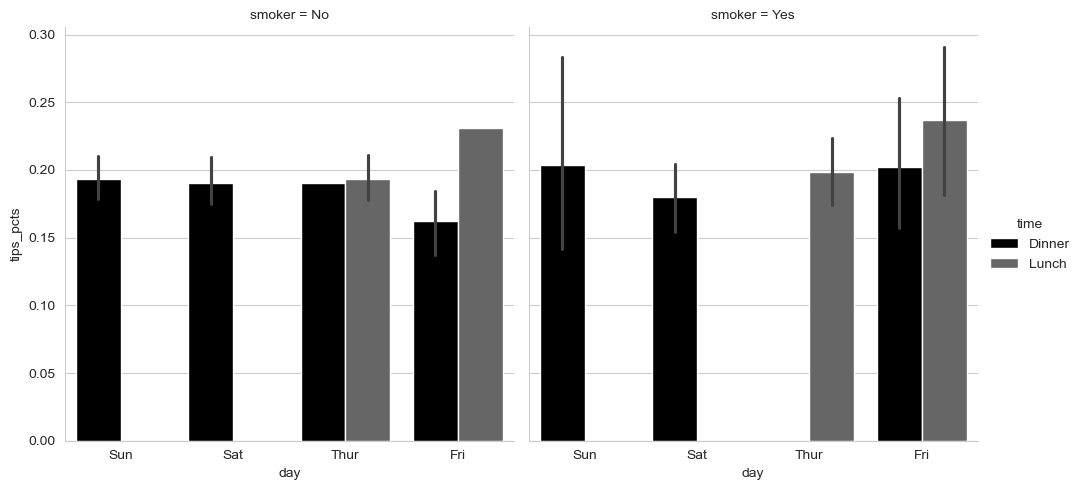

In [77]:
# seaborn有一个实用的内置函数catplot，可以简化制作多种分面图
sns.catplot(x="day", y="tips_pcts", hue="time", col="smoker", kind="bar", data=tips[tips.tips_pcts < 1]);

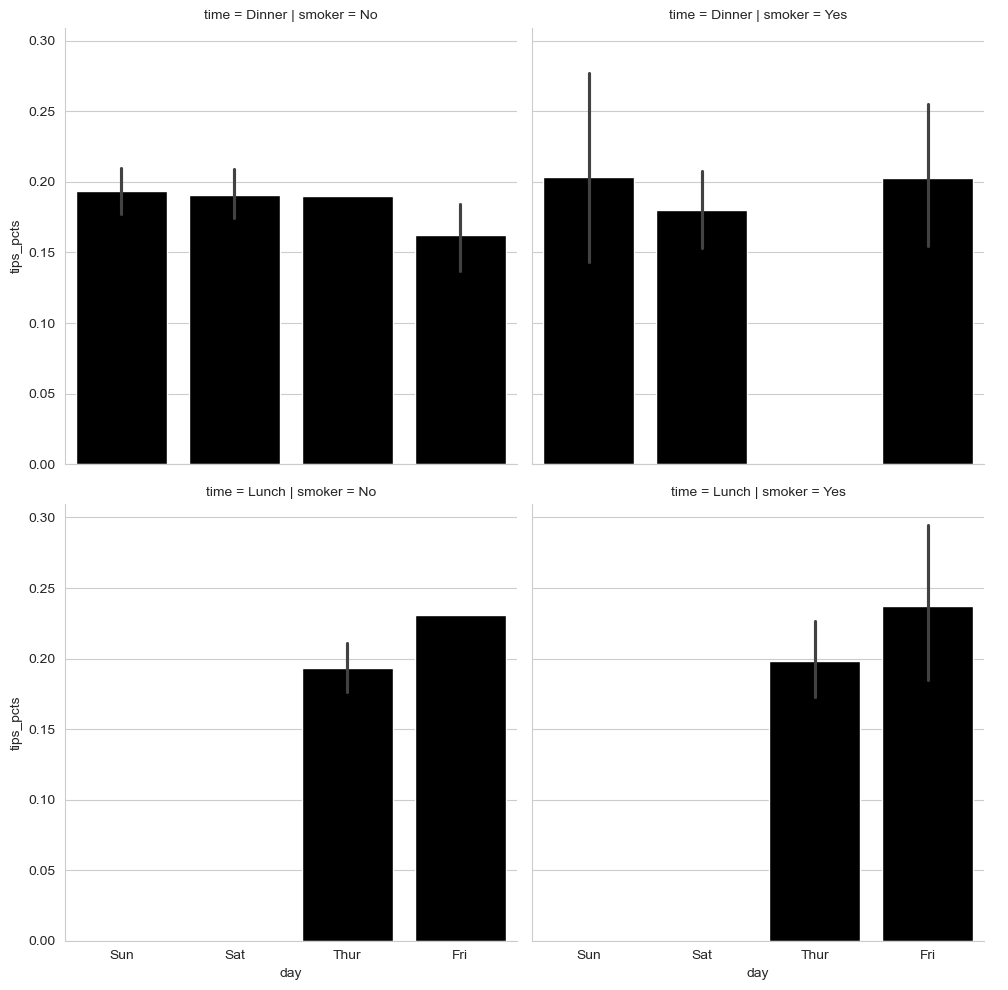

In [78]:
# 根据颜色分组
sns.catplot(x="day", y="tips_pcts", row="time", col="smoker", kind="bar", data=tips[tips.tips_pcts < 1]);

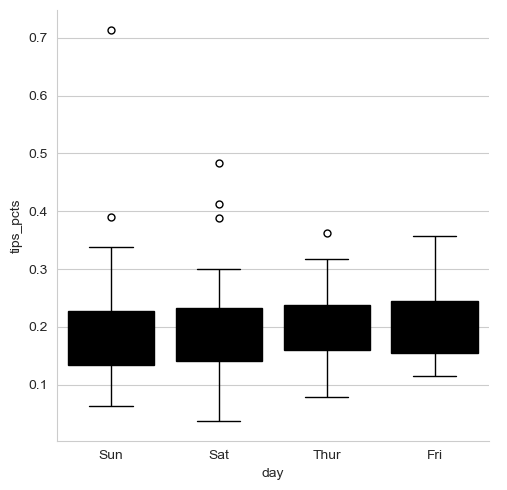

In [81]:
sns.catplot(x="day", y="tips_pcts", kind="box", data=tips[tips.tips_pcts < 1]);